In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 49.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=cd5563d45426f9dd15ca10e534a8659c5578457b7f1caba8f8ea8bea5761f9b4
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Telco churn") \
    .enableHiveSupport() \
    .getOrCreate()

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/WIH3003 Big Data/BDA Case Study/Telco-Customer-Churn.csv')

In [ ]:
df = spark.createDataFrame(df)
df.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|  

In [ ]:
churnSchema = StructType() \
                    	.add("customerID", "string")\
                    	.add("gender", "string")\
                    	.add("SeniorCitizen", "long")\
                    	.add("Partner", "string")\
                      .add("Dependents", "string")\
                    	.add("tenure", "long")\
                    	.add("PhoneService", "string")\
                    	.add("MultipleLines", "string")\
                    	.add("InternetService", "string")\
                    	.add("OnlineSecurity", "string")\
                    	.add("OnlineBackup", "string")\
                    	.add("DeviceProtection", "string")\
                    	.add("TechSupport", "string")\
                    	.add("StreamingTV", "string")\
                    	.add("StreamingMovies", "string")\
                    	.add("Contract", "string")\
                    	.add("PaperlessBilling", "string")\
                    	.add("PaymentMethod", "string")\
                    	.add("MonthlyCharges", "double")\
                    	.add("TotalCharges", "string")\
                    	.add("Churn", "string")

In [ ]:
df=spark.read.csv("hdfs://localhost:9000/telco_customer_churn", schema=churnSchema)
df.show(5)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|            No|         Yes|              No|         No|    

In [ ]:
df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: long (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: long (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [ ]:
df.dtypes

[('customerID', 'string'),
 ('gender', 'string'),
 ('SeniorCitizen', 'bigint'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('tenure', 'bigint'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'string'),
 ('Churn', 'string')]

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0| 

In [ ]:
df = df.drop('customerID','PaymentMethod','TotalCharges')
df.show()

+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------+-----+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|MonthlyCharges|Churn|
+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------+-----+
|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|                 No|                Yes|                 No|                 No|                 No|  

In [ ]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler,MinMaxScaler
from pyspark.ml import Pipeline

stages = []
numerical_columns = ['SeniorCitizen','tenure','MonthlyCharges']
categorical_columns= ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling']

for categoricalCol in categorical_columns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + ' Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + " OHE"])
    stages += [stringIndexer, encoder]

label_string_idx = StringIndexer(inputCol = 'Churn', outputCol = 'label')
stages.append(label_string_idx)

assemblerInputs = [c + " OHE" for c in categorical_columns] + numerical_columns
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features_vec")
stages.append(assembler)
print(f"Number of stages: {len(stages)}")

scalers = MinMaxScaler(inputCol="features_vec", outputCol="features")
stages.append(scalers)

pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
preprocessed_df = pipelineModel.transform(df)
preprocessed_df.head()

Number of stages: 30


Row(gender='Female', SeniorCitizen=0, Partner='Yes', Dependents='No', tenure=1, PhoneService='No', MultipleLines='No phone service', InternetService='DSL', OnlineSecurity='No', OnlineBackup='Yes', DeviceProtection='No', TechSupport='No', StreamingTV='No', StreamingMovies='No', Contract='Month-to-month', PaperlessBilling='Yes', MonthlyCharges=29.85, Churn='No', gender Index=1.0, gender OHE=SparseVector(1, {}), Partner Index=1.0, Partner OHE=SparseVector(1, {}), Dependents Index=0.0, Dependents OHE=SparseVector(1, {0: 1.0}), PhoneService Index=1.0, PhoneService OHE=SparseVector(1, {}), MultipleLines Index=2.0, MultipleLines OHE=SparseVector(2, {}), InternetService Index=1.0, InternetService OHE=SparseVector(2, {1: 1.0}), OnlineSecurity Index=0.0, OnlineSecurity OHE=SparseVector(2, {0: 1.0}), OnlineBackup Index=1.0, OnlineBackup OHE=SparseVector(2, {1: 1.0}), DeviceProtection Index=0.0, DeviceProtection OHE=SparseVector(2, {0: 1.0}), TechSupport Index=0.0, TechSupport OHE=SparseVector(2, 

In [ ]:
pd.DataFrame(preprocessed_df.take(5), columns=preprocessed_df.columns).transpose()

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [ ]:
train, test = preprocessed_df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 4962
Test Dataset Count: 2081


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=50)
rfModel = rf.fit(train)

In [ ]:
predictions = rfModel.transform(test)
predictions.select(['label', 'features', 'rawPrediction', 'probability', 'prediction']).show(10)

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  1.0|(26,[1,2,7,8,10,1...|[27.1364641254533...|[0.54272928250906...|       0.0|
|  1.0|(26,[1,2,3,4,7,8,...|[27.3451466211004...|[0.54690293242200...|       0.0|
|  1.0|(26,[1,2,3,4,7,8,...|[27.3451466211004...|[0.54690293242200...|       0.0|
|  1.0|(26,[1,2,3,4,7,8,...|[26.4177234037097...|[0.52835446807419...|       0.0|
|  0.0|(26,[1,2,3,4,7,8,...|[30.8222844760014...|[0.61644568952002...|       0.0|
|  0.0|(26,[1,2,3,4,7,8,...|[28.9175326436554...|[0.57835065287310...|       0.0|
|  0.0|(26,[1,2,3,4,6,8,...|[17.6927526400959...|[0.35385505280191...|       1.0|
|  1.0|(26,[1,2,3,4,6,8,...|[19.8818847541387...|[0.39763769508277...|       1.0|
|  1.0|(26,[1,2,3,4,6,8,...|[17.7078048742464...|[0.35415609748492...|       1.0|
|  1.0|(26,[1,2,

Accuracy score of predicted data : 0.7803940413262854
Precision Score of predicted data : 0.6891385767790262
Recall Score of predicted data : 0.32974910394265233
F1 Score of predicted data : 0.4460606060606061


Text(0.5, 15.0, 'Predicted label')

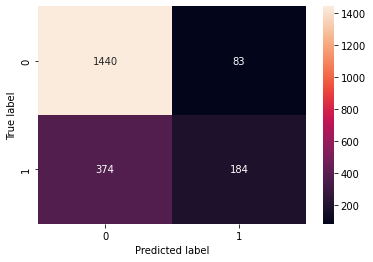

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import seaborn as sns
actual = predictions.select('label').toPandas()
predicted = predictions.select('prediction').toPandas()

print('Accuracy score of predicted data :',accuracy_score(actual, predicted))

# precision score
print('Precision Score of predicted data :',precision_score(actual, predicted))

# recall score
print('Recall Score of predicted data :',recall_score(actual, predicted))

# F1 score
print('F1 Score of predicted data :',f1_score(actual, predicted))

cf_matrix = confusion_matrix(actual, predicted)
sns.heatmap(cf_matrix, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
preprocessed_df.toPandas().to_csv('telco_churn.csv')

In [ ]:
!cp telco_churn.csv "/content/gdrive/MyDrive/WIH3003 Big Data/BDA Case Study/"

In [ ]:
preprocessed_df.show()

+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------+-----+------------+-------------+-------------+-------------+----------------+--------------+------------------+----------------+-------------------+-----------------+---------------------+-------------------+--------------------+------------------+------------------+----------------+----------------------+--------------------+-----------------+---------------+-----------------+---------------+---------------------+-------------------+--------------+-------------+----------------------+--------------------+-----+--------------------+--------------------+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|    